
## Implement a Convolution Neural Network for numerical data and test for overfitting.

## Aim: To Implement a Convolution Neural Network for 1-Dimensional Data
### Objective: To analyse if the model is overfitting and implement the various regularization techniques to avoid overfiiting. And,Compare which regularization technique is the best for the give model.

# Dataset: Randomly generated data using make_classification module

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
variables, target =make_classification(n_samples = 1000, n_features=12, n_classes=2, random_state=42)

In [ ]:
features =pd.DataFrame(variables)
features.columns=["column "+ str(i) for i in range(variables.shape[1])]

In [ ]:
features

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11
0,-2.050321,1.343995,-1.269471,0.408653,-1.776235,-1.522359,-1.029372,1.112688,1.417767,-0.629263,-1.352670,1.533728
1,-0.420747,0.339269,-0.587236,-0.814686,-1.018805,2.165521,-0.455342,1.054621,0.424709,1.024774,-0.353859,1.168580
2,-1.216192,0.304284,1.784577,1.687548,-1.039111,-0.628149,0.245114,1.286382,-0.197959,-0.257052,0.726794,0.277553
3,0.314983,-0.241559,0.375642,-0.648999,0.265164,-1.081413,0.883607,0.335847,-0.291755,0.516397,-1.366198,-1.245051
4,-0.729670,0.248061,0.733484,-1.627312,-0.300826,-0.728959,0.186990,-0.189014,0.019287,0.180295,-0.044273,-0.814868
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.963526,0.826134,1.157283,0.294719,-0.244028,-0.886040,0.693218,-0.332579,0.386193,0.703140,-2.027677,2.498430
996,-1.412515,0.796509,-0.208423,0.839349,1.393181,-0.079388,0.872824,-0.300466,0.704001,-1.005601,-0.966157,0.360164
997,-1.095660,0.134351,2.327273,1.353454,1.607915,0.291379,1.346572,0.032185,-0.472941,0.872817,1.443670,0.732081
998,-1.665910,1.142580,-1.291783,0.148089,0.367620,1.186735,-0.881068,1.436335,1.258534,-0.238110,-0.712221,0.046003


In [ ]:
target= pd.DataFrame(target)

In [ ]:
X = features.values
X= X.reshape(X.shape[0], X.shape[1],1)
X.shape

(1000, 12, 1)

In [ ]:
X = features.values
y = target.values
X= X.reshape(X.shape[0], X.shape[1],1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y, test_size=0.20, random_state=42)
X_train, X_val, y_train,y_val=train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((640, 12, 1), (640, 1), (200, 12, 1), (200, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from sklearn.model_selection import train_test_split
from keras import regularizers

* In the CNN model we have used "Binary Cross Entropy" as the loss function and "Adam" as the optimizer. We have trained the model on 400 epochs.

In [ ]:
model = Sequential()
model.add(Conv1D(64,3, input_shape=(12,1), activation='relu'))
model.add(Dense(100, activation ="relu"))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=400, verbose=0)
lossO, accuracyO = model.evaluate(X_test, y_test)
print("Loss: ", round(lossO,2), "Accuracy: ","%.2f"%accuracyO)

7/7 [==============================] - 0s 3ms/step - loss: 1.0306 - accuracy: 0.4600
Loss:  1.03 Accuracy:  0.46


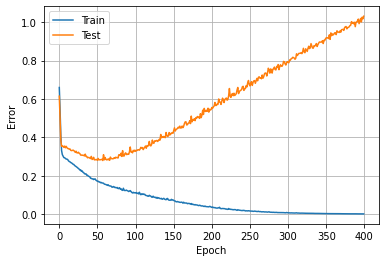

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Test')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(history)

* Here, in the above graph we can see that the test error > train error leading the model to overfit
* Reducing the overfitting through Regularization, Drop Out and Early Stopping

# Regularized Model

In [ ]:
model1 = Sequential()
model1.add(Conv1D(64,3, input_shape=(12,1), activation='relu'))
model1.add(Dense(100, activation ="relu",  kernel_regularizer=regularizers.l2(0.005)))
model1.add(Flatten())
model1.add(Dense(1, activation='softmax', kernel_regularizer=regularizers.l2(0.005)))
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train,
                     validation_data=(X_val, y_val),
                    epochs=400, verbose=0)
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print("Loss: ", round(loss1,2), "Accuracy: ","%.2f"%accuracy1)

7/7 [==============================] - 0s 3ms/step - loss: 0.3107 - accuracy: 0.4600
Loss:  0.31 Accuracy:  0.46


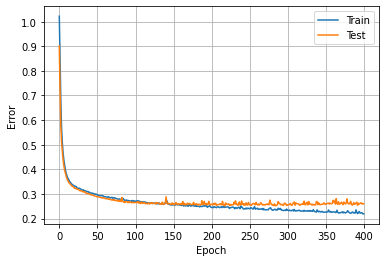

In [ ]:
plot_loss(history1)

* The test error has reduced drastically with L2 regularization technique

In [ ]:
model2 = Sequential()
model2.add(Conv1D(64,3, input_shape=(12,1), activation='relu'))
model2.add(Dense(100, activation ="relu",  kernel_regularizer=regularizers.l1(0.001)))
model2.add(Flatten())
model2.add(Dense(1, activation='softmax', kernel_regularizer=regularizers.l1(0.001)))
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=250, verbose=0)
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print("Loss: ", round(loss2,2), "Accuracy: ","%.2f"%accuracy2)
plot_loss(history2)

* The Train and test error are approximately equal when we used the L1 regularization technique

# Drop Out

In [ ]:
from tensorflow.keras.layers import Dropout

7/7 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.4600
Loss:  0.26 Accuracy:  0.46


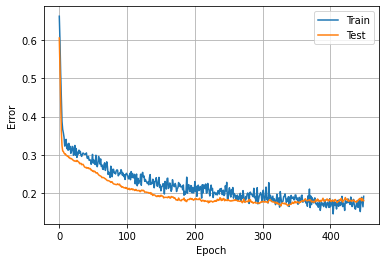

In [ ]:
model3 = Sequential()
model3.add(Conv1D(64,3, input_shape=(12,1), activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(100, activation ="relu"))
model3.add(Dropout(0.6))
model3.add(Flatten())
model3.add(Dense(1, activation='softmax'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history3 = model3.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=450, verbose=0)
loss3, accuracy3= model3.evaluate(X_test, y_test)
print("Loss: ", round(loss3,2), "Accuracy: ","%.2f"%accuracy3)
plot_loss(history3)

* When we used dropout method, it resulted in the train error and the test error being approximately same

# Early Stopping

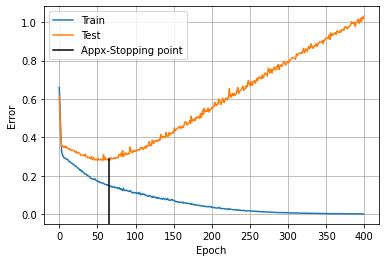

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.axvline(x = 65, color="k", ymin=0, ymax = 0.3, label = "Appx-Stopping point")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model4 = Sequential()
model4.add(Conv1D(64,3, input_shape=(12,1), activation='relu'))
model4.add(Dense(100, activation ="relu"))
model4.add(Flatten())
model4.add(Dense(1, activation='softmax'))

model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callback=EarlyStopping(monitor="val_loss")
history4 = model4.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=20, verbose=0)
loss4, accuracy4= model4.evaluate(X_test, y_test)
print("Loss: ", round(loss4,2), "Accuracy: ","%.2f"%accuracy4)
plot_loss(history4)

In [ ]:
model5 = Sequential()
model5.add(Conv1D(64,3, input_shape=(12,1), activation='relu'))
model5.add(Dense(100, activation ="relu"))
model5.add(Flatten())
model5.add(Dense(1, activation='softmax'))

model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callback=EarlyStopping(monitor="val_loss")
history5 = model5.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10, verbose=0)
loss5, accuracy5= model5.evaluate(X_test, y_test)
print("Loss: ", round(loss5,2), "Accuracy: ","%.2f"%accuracy5)
plot_loss(history5)

* In the early stopping method as well, the train and test errors are almost equal resulting in a balanced model. When the epochs was decreased to 10, the train error and the test error coincided.

# Batch Normalization

In [ ]:
from tensorflow.keras.layers import  BatchNormalization


model6 = Sequential()
model6.add(Conv1D(64,3, input_shape=(12,1), activation='relu'))
BatchNormalization()
model6.add(Dense(100, activation ="relu"))
model6.add(Flatten())
model6.add(Dense(1, activation='softmax'))

model6.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
callback=EarlyStopping(monitor="val_loss")
history6 = model6.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=150, verbose=0)
loss6, accuracy6= model6.evaluate(X_test, y_test)
print("Loss: ", round(loss6,2), "Accuracy: ","%.2f"%accuracy6)
plot_loss(history6)

Performing Batch Normalization with SGD optimizer and 150 epochs, the train and test error are approximately equal

In [ ]:
import pandas as pd
Model= [1,2,3,4,5,6,7]
Epochs = [history.epoch[-1]+1, history1.epoch[-1]+1, history2.epoch[-1]+1, history3.epoch[-1]+1, history4.epoch[-1]+1, history5.epoch[-1]+1, history6.epoch[-1]+1]
loss = [lossO, loss1, loss2, loss3,loss4, loss5, loss6]
hidden_layers=[1,1,1,1,1,1,1]
optimizer= ["Adam", "Adam", "Adam", "Adam", "Adam", "Adam", "SGD"]
accuracy=[accuracyO, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
Regularizer =["Original", "L2", "L1", "DropOut", "Early Stopping-1","Early Stopping-2", "Batch Normalizer" ]
data = {"Model": Model, "Techniques": Regularizer, "Epochs": Epochs, "Hidden Layers": hidden_layers, "Optimizer": optimizer,"Loss":loss,  "Accuracy":accuracy}
pd.DataFrame(data)

,Model,Techniques,Epochs,Hidden Layers,Optimizer,Loss,Accuracy
0,1,Original,400,1,Adam,1.030586,0.46
1,2,L2,400,1,Adam,0.310701,0.46
2,3,L1,250,1,Adam,0.266853,0.46
3,4,DropOut,450,1,Adam,0.257787,0.46
4,5,Early Stopping-1,20,1,Adam,0.330297,0.46
5,6,Early Stopping-2,10,1,Adam,0.351343,0.46
6,7,Batch Normalizer,150,1,SGD,0.346393,0.46


Conclusion:
* When we trained the model on the original data, the test error was highly greater than train error and resulted in an overfit model. To overcome this, we applied three techniques namely  - L1,L2 regularizer, DropOut, and Early Stopping Method. Each of these models were trained on one hidden layer and Adam Optimizer for  different epochs. After applying these techniques the test error reduced drastically and in some cases, the test error and the train error coincided resulting a balanced model.
* We also used the Batch Normalization for efficient updation of weights and the right use of Activation Function to avaoid vanishing and exploding gradient descent problem. The model was trained on SGD optimizer was 150 epochs consisting of one hidden layer and achieved an accuracy of 46%

